In [101]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
df_wines = pd.read_csv("wines.csv")
df_wines.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


In [3]:
df_feats = df_wines.copy().drop(columns = ['Start assignment', 'ranking'])
df_feats.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feats.values)
ar_feats_nml = scaler.transform(df_feats.values)

In [5]:
df_feats_nml = pd.DataFrame(data = ar_feats_nml, columns = df_feats.columns)
df_feats_nml.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
2,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
3,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675
4,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055


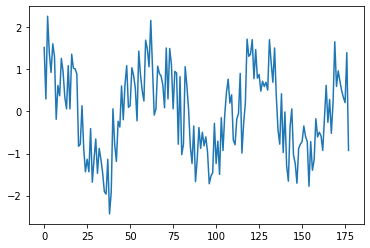

In [105]:
plt.plot(df_feats_nml['Alcohol %'])

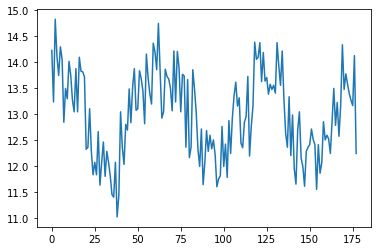

In [106]:
plt.plot(df_feats['Alcohol %'])

In [100]:
df_feats_nml.std()

Alcohol %           1.002821
Malic Acid          1.002821
Ash                 1.002821
Alkalinity          1.002821
Mg                  1.002821
Phenols             1.002821
Flavanoids          1.002821
Phenols.1           1.002821
Proantho-cyanins    1.002821
Color intensity     1.002821
Hue                 1.002821
OD280 315           1.002821
Proline             1.002821
dtype: float64

In [6]:
df_feats['Alkalinity'].std()

3.339563767173506

#  Q2

In [7]:
def gaussian(x_val, x_mean, x_std):
    cmn_scal = 2 * (x_std)**2
    scalar = (1 / np.sqrt(np.pi * cmn_scal))
    exponent = -1 *(((x_val - x_mean) **2) / cmn_scal)
    prob = scalar * np.exp(exponent)
    return prob

    
    

In [8]:
gaussian(20, df_feats['Alkalinity'].mean(), df_feats['Alkalinity'].std())

0.11810105635176237

In [15]:
atemp = df_feats[df_wines['ranking'] == 1].head()
atemp

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320


### the Naive Bayes Classifier


In [114]:
class NaiveBayesClassifier():
    def __init__(self):
        self.type_indices={}    # store the indices of wines that belong to each cultivar as a boolean array of length 178
        self.type_stats={}      # store the mean and std of each cultivar
        self.ndata = 0
        self.trained=False
    
    @staticmethod
    def pdf(x, feat_mean, feat_std):
        # probability distribution function
        cmn_scal = 2 * (feat_std)**2
        scalar = (1 / np.sqrt(np.pi * cmn_scal))
        exponent = -1 *(((x - feat_mean) **2) / cmn_scal)
        prob = scalar * np.exp(exponent)
        return prob
    
    @staticmethod
    def calculate_statistics(x_values):
        # Returns a list with length of input features. 
        # Each element is a tuple, with the input feature's average and standard deviation
        n_feats=x_values.shape[1]
        return [(np.average(x_values[:,n]), np.std(x_values[:,n])) for n in range(n_feats)]
    
    @staticmethod
    def calculate_prob(x_input, mn_std_clfts):
        """
        Calculate the probability that the input features belong to a specific class(P(X|C)), 
        defined by the statistics of features in that class
        x_input: np.array shape(nfeatures)
        
        Other additional parameters as needed for calculating probabilities.
        Hint: this can be a list of tuple [(mean1,std1), (means2,std2),...]
        """ 
        ft_cnd_pbs = [NaiveBayesClassifier.pdf(x_input[i], mn_std_clfts[i][0], mn_std_clfts[i][1]) for i in range(len(mn_std_clfts))]
        init_prob = np.prod(ft_cnd_pbs)
        return init_prob
    
    def fit(self,xs,ys):
        # Train the classifier by calculating the statistics of different features in each class
        self.ndata = len(ys)
        for y in set(ys):
            type_filter= (ys==y)
            self.type_indices[y]=type_filter
            self.type_stats[y]=self.calculate_statistics(xs[type_filter])
        self.trained=True
            
    def predict(self, xs):
        # Do the prediction by outputing the class that has highest probability
        if len(xs.shape)>1:
            print("Only accepts one sample at a time!")
        if self.trained:
            guess=None
            max_prob=0
            # P(C|X) = P(X|C)*P(C) / sum_i(P(X|C_i)*P(C_i)) (deniminator for normalization only, can be ignored)
            #for y_type in self.type_stats:
            for y in self.type_indices.keys():
                class_prob = self.type_indices[y].sum() / len(self.type_indices[y])
                prob= class_prob * self.calculate_prob(xs, self.type_stats[y])
                if prob>max_prob:
                    max_prob=prob
                    # guess=y_type
                    guess = y
            return guess
        else:
            print("Please train the classifier first!")

In [79]:
NBC = NaiveBayesClassifier()
NBC.fit(df_feats.values, df_wines['ranking'].values)
NBC.type_stats
NBC.type_indices[1].sum() / len(NBC.type_indices[1])

{1: [(13.744745762711865, 0.4581923063525723),
  (2.010677966101695, 0.6826887630111),
  (2.4555932203389834, 0.22523261938580774),
  (17.03728813559322, 2.524651229820095),
  (106.33898305084746, 10.409594937480737),
  (2.840169491525423, 0.3360765223870026),
  (2.982372881355932, 0.3941106227867916),
  (0.29, 0.06945306914427413),
  (1.8993220338983052, 0.40860185090789153),
  (5.528305084745762, 1.2280315688295402),
  (1.0620338983050848, 0.11549128165814294),
  (3.1577966101694916, 0.3540375724416456),
  (1115.7118644067796, 219.63544918159715)],
 2: [(12.278732394366196, 0.5341623153044869),
  (1.932676056338028, 1.0083914924783715),
  (2.2447887323943654, 0.3132377900453227),
  (20.238028169014086, 3.32609681992941),
  (94.54929577464789, 16.635096728484584),
  (2.2588732394366198, 0.5415068940707273),
  (2.080845070422536, 0.7007134120708558),
  (0.363661971830986, 0.12308521537536185),
  (1.6302816901408446, 0.5978128489258201),
  (3.08661971830986, 0.918392569506017),
  (1.056

In [85]:
NBC.type_stats[1]

[(13.744745762711865, 0.4581923063525723),
 (2.010677966101695, 0.6826887630111),
 (2.4555932203389834, 0.22523261938580774),
 (17.03728813559322, 2.524651229820095),
 (106.33898305084746, 10.409594937480737),
 (2.840169491525423, 0.3360765223870026),
 (2.982372881355932, 0.3941106227867916),
 (0.29, 0.06945306914427413),
 (1.8993220338983052, 0.40860185090789153),
 (5.528305084745762, 1.2280315688295402),
 (1.0620338983050848, 0.11549128165814294),
 (3.1577966101694916, 0.3540375724416456),
 (1115.7118644067796, 219.63544918159715)]

In [80]:
NaiveBayesClassifier.calculate_statistics(df_feats.values)

[(13.000617977528092, 0.8095429145285168),
 (2.3363483146067416, 1.1140036269797895),
 (2.3665168539325845, 0.27357229442643255),
 (19.49494382022472, 3.330169757658213),
 (99.74157303370787, 14.242307673359806),
 (2.295112359550562, 0.6240905641965369),
 (2.0292696629213482, 0.996048950379233),
 (0.3618539325842696, 0.12410325988364795),
 (1.5908988764044947, 0.5707488486199379),
 (5.058089882022472, 2.3117646609525573),
 (0.9574494382022471, 0.22792860656507252),
 (2.6116853932584267, 0.7079932646716005),
 (746.8932584269663, 314.0216568419878)]

In [81]:
type_indices = {}
type_stats = {}
for y in set(ys):
    ndata = len(ys)
    type_filter= ((ys) ==y)
    type_indices[y]=type_filter
    print(y)
    type_stats[y] = calc_stats(df_feats[type_filter].values)

1
2
3


In [82]:
type_stats[1][0]

(13.744745762711865, 0.4581923063525723)

In [83]:
NaiveBayesClassifier.pdf(df_feats.iloc[0].values[0], type_stats[1][0][0], type_stats[1][0][1])

0.49694356930836897

In [84]:
NaiveBayesClassifier.calculate_prob(df_feats.iloc[0].values, type_stats[1])

2.952253244188389e-07

A performance tester:

In [40]:
def calculate_accuracy(model,xs,ys):
    y_pred=np.zeros_like(ys)
    for idx,x in enumerate(xs):
        y_pred[idx]=model.predict(x)
    return np.sum(ys==y_pred)/len(ys)



Using Gaussian distribution since the features are continuous and assuming each of the features follow a gaussian distribution. 

In [28]:
cond_probs = [gaussian(df_feats.iloc[0].values[i], type_stats[1][i][0], type_stats[1][i][1]) for i in range(len(type_stats[1]))]
cond_probs

[0.49694356930836897,
 0.5303529848405252,
 1.7598474095746308,
 0.13437865915872102,
 0.0053460777706433905,
 1.1786088157308614,
 0.9928128937874166,
 5.684823387137016,
 0.6181524220113459,
 0.3235222383062754,
 3.3920091617569956,
 0.11101937178669695,
 0.0017686070853778631]

In [30]:
np.prod(cond_probs)

2.952253244188389e-07

## 2b:

In [115]:
def calculate_accuracy(model,xs,ys):
    y_pred=np.zeros_like(ys)
    for idx,x in enumerate(xs):
        y_pred[idx]=model.predict(x)
    return np.sum(ys==y_pred)/len(ys)

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feats_nml.values, df_wines['ranking'], test_size=0.33)
X_train.shape

(119, 13)

In [120]:
NBC = NaiveBayesClassifier()
NBC.fit(X_train, y_train)
# train accuracy
train_ac = calculate_accuracy(NBC, X_train, y_train)
print("Train accuracy: " + str(train_ac))
# test accuracy
test_ac = calculate_accuracy(NBC, X_test, y_test)
print("Test accuracy: " + str(test_ac))

Train accuracy: 0.9915966386554622
Test accuracy: 0.9152542372881356


# Q3

Hint: cross entropy loss of pytorch (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) works by taking in $\hat{y}$ (your model prediction) as a tensor of size (Batchsize, number of class) and y (reference values) as a tensor of size (Batchsize,). You can think of each element ($X_{ij}$) of the tensor $\hat{y}$ tensor as the probability that the element i belong to class j. And each element of y should be a int/torch.long that is a number between \[0, number_of_class-1]  

With sufficient hyperparameter tunning, your train/test accuracies should be >= 95%.

You can save a model and reload it by calling:

In [ ]:
weights = model.state_dict()
model.load_state_dict(weights)

In [ ]:
# you can use this framework to do training and validation           
def train_and_val(model,train_X,train_y,epochs,draw_curve=True):
    """
    Parameters
    --------------
    model: a PyTorch model
    train_X: np.array shape(ndata,nfeatures)
    train_y: np.array shape(ndata)
    epochs: int
    draw_curve: bool
    """
    ### Define your loss function, optimizer. Convert data to torch tensor ###
    ...
    
    
    ### Split training examples further into training and validation ###

    val_array=[]
    lowest_val_loss = np.inf
    
    for i in range(epochs):
        ### Compute the loss and do backpropagation ###
        ...
        
        ### compute validation loss and keep track of the lowest val loss ###
        
        ...   
        val_array.append(...)
        

                
     # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs=np.argmin(val_array)+1
    print("Number of epochs with lowest validation:",final_epochs)
    ### Recover the model weight ###
    ...

    if draw_curve:
        plt.figure()
        plt.plot(np.arange(len(val_array))+1,val_array,label='Validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        
